In [1]:
#import pickle and load the data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = open('protein_lig_dataset.pkl','rb')
emp = pickle.load(data)

In [2]:
type(emp)

list

In [3]:
#convert the list into array
emp = np.array(emp)

In [4]:
import numpy as np

In [5]:
emp

array([[[3.8120477 , 5.480417  , 0.26241824],
        [4.018627  , 5.397477  , 0.7805651 ],
        [4.095855  , 5.4338727 , 0.5564023 ],
        ...,
        [0.8823339 , 5.009919  , 2.5987186 ],
        [3.5906274 , 6.7507157 , 3.404649  ],
        [6.4236026 , 6.113418  , 6.793401  ]],

       [[3.7482612 , 5.2103825 , 1.3651854 ],
        [4.2551312 , 4.9739637 , 1.4138727 ],
        [4.064593  , 5.059913  , 1.2821064 ],
        ...,
        [0.2497484 , 3.5127943 , 4.615086  ],
        [2.8282008 , 5.4973693 , 4.879123  ],
        [4.3420157 , 5.11742   , 0.22024642]],

       [[4.459348  , 5.357123  , 1.5383621 ],
        [4.526068  , 4.8826456 , 1.4755954 ],
        [4.5193973 , 5.118796  , 1.4945167 ],
        ...,
        [1.8371508 , 1.663145  , 6.4002557 ],
        [0.75804514, 4.22783   , 6.491375  ],
        [3.2254112 , 0.75039464, 5.232858  ]],

       ...,

       [[6.12463   , 1.0921185 , 1.3837517 ],
        [5.981831  , 1.0576991 , 1.9494332 ],
        [5.9855623 , 1

In [6]:
#check the file
type(emp)

numpy.ndarray

In [7]:
#find the shape of the array
np.shape(emp)

(1195, 32213, 3)

In [8]:
#indexing the file based on the atom types: ligand, protein, water
ligand_pos = emp[:,0:56,:]
protein_pos = emp[:,56:1892,:]
water_pos = emp[:,1892:32210,:]

In [9]:
#check the shape of the atom ligand
np.shape(ligand_pos)

(1195, 56, 3)

In [10]:
#import mdtraj
import mdtraj as mdj

In [11]:
!pip install biopandas

In [12]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb()
ppdb.read_pdb('bptf_AU1 (1).pdb')

In [13]:
df = ppdb.df['ATOM']
df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,H14,,UNK,,A,0,,...,2.262,55.767,12.891,1.0,0.0,,SML,H,NaN,1
1,ATOM,2,,N3,,UNK,,A,0,,...,-0.764,50.432,12.594,1.0,0.0,,SML,N,NaN,2
2,ATOM,3,,N2,,UNK,,A,0,,...,0.683,52.208,13.548,1.0,0.0,,SML,N,NaN,3
3,ATOM,4,,C11,,UNK,,A,0,,...,-0.806,55.522,13.070,1.0,0.0,,SML,C,NaN,4
4,ATOM,5,,H9,,UNK,,A,0,,...,-1.573,55.124,13.750,1.0,0.0,,SML,H,NaN,5


In [14]:
df.keys()

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')

In [15]:
df_pro = df[df['residue_name'] == 'PRO']
df_pro.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
125,ATOM,126,,N,,PRO,,A,68,,...,-10.871,61.707,-18.620,1.0,0.0,,PROA,N,NaN,126
126,ATOM,127,,CD,,PRO,,A,68,,...,-11.491,62.699,-19.564,1.0,0.0,,PROA,C,NaN,127
127,ATOM,128,,HD3,,PRO,,A,68,,...,-11.534,62.262,-20.585,1.0,0.0,,PROA,H,NaN,128
128,ATOM,129,,HD2,,PRO,,A,68,,...,-10.842,63.595,-19.666,1.0,0.0,,PROA,H,NaN,129
129,ATOM,130,,CA,,PRO,,A,68,,...,-11.978,61.072,-17.821,1.0,0.0,,PROA,C,NaN,130


In [16]:
type(df_pro)

pandas.core.frame.DataFrame

In [17]:
ppdb.df['ANISOU'].empty

True

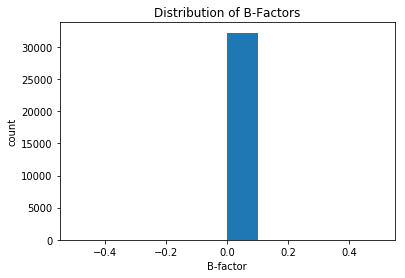

In [18]:
df['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

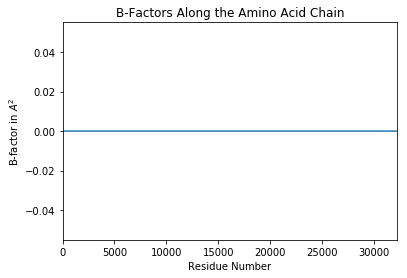

In [19]:
df['b_factor'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

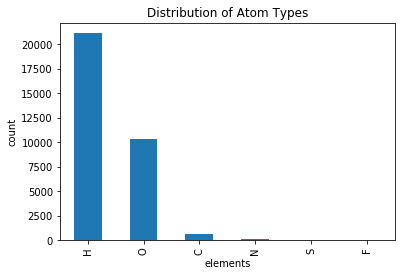

In [20]:
df['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

In [21]:
#filter pdb by distance
reference_point = (-10.871, 61.707, -18.620) #atom 126 
distances = ppdb.distance(xyz=reference_point, records=('ATOM',))

In [22]:
type(distances)

pandas.core.series.Series

In [23]:
dist = distances.to_frame(name='distances')

In [24]:
dist

,distances
0,34.651153
1,34.692807
2,35.475430
3,33.820327
4,34.316258
5,34.361737
6,35.794088
7,33.739362
8,32.740980
9,33.447219


In [25]:
import pandas as pd

In [26]:
new_df = df.join(dist)
new_df

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,distances
0,ATOM,1,,H14,,UNK,,A,0,,...,55.767,12.891,1.0,0.0,,SML,H,NaN,1,34.651153
1,ATOM,2,,N3,,UNK,,A,0,,...,50.432,12.594,1.0,0.0,,SML,N,NaN,2,34.692807
2,ATOM,3,,N2,,UNK,,A,0,,...,52.208,13.548,1.0,0.0,,SML,N,NaN,3,35.475430
3,ATOM,4,,C11,,UNK,,A,0,,...,55.522,13.070,1.0,0.0,,SML,C,NaN,4,33.820327
4,ATOM,5,,H9,,UNK,,A,0,,...,55.124,13.750,1.0,0.0,,SML,H,NaN,5,34.316258
5,ATOM,6,,C8,,UNK,,A,0,,...,53.143,12.841,1.0,0.0,,SML,C,NaN,6,34.361737
6,ATOM,7,,H13,,UNK,,A,0,,...,54.393,13.924,1.0,0.0,,SML,H,NaN,7,35.794088
7,ATOM,8,,C10,,UNK,,A,0,,...,51.467,12.122,1.0,0.0,,SML,C,NaN,8,33.739362
8,ATOM,9,,H8,,UNK,,A,0,,...,55.824,12.131,1.0,0.0,,SML,H,NaN,9,32.740980
9,ATOM,10,,C9,,UNK,,A,0,,...,52.872,12.141,1.0,0.0,,SML,C,NaN,10,33.447219


In [27]:
new_df.columns

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx',
       'distances'],
      dtype='object')

In [28]:
ligand = new_df['residue_name'] == 'UNK'
new_df_ligand = new_df[ligand]
print(np.shape(new_df_ligand))
new_df_ligand.head()

(56, 22)


,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,distances
0,ATOM,1,,H14,,UNK,,A,0,,...,55.767,12.891,1.0,0.0,,SML,H,NaN,1,34.651153
1,ATOM,2,,N3,,UNK,,A,0,,...,50.432,12.594,1.0,0.0,,SML,N,NaN,2,34.692807
2,ATOM,3,,N2,,UNK,,A,0,,...,52.208,13.548,1.0,0.0,,SML,N,NaN,3,35.475430
3,ATOM,4,,C11,,UNK,,A,0,,...,55.522,13.070,1.0,0.0,,SML,C,NaN,4,33.820327
4,ATOM,5,,H9,,UNK,,A,0,,...,55.124,13.750,1.0,0.0,,SML,H,NaN,5,34.316258


In [29]:
new_df_ligand.describe()

,atom_number,residue_number,x_coord,y_coord,z_coord,occupancy,b_factor,charge,line_idx,distances
count,56.000000,56.0,56.000000,56.000000,56.000000,56.0,56.0,0.0,56.000000,56.000000
mean,28.500000,0.0,2.153250,55.498732,13.236429,1.0,0.0,NaN,28.500000,35.322028
std,16.309506,0.0,2.193404,4.589382,1.710117,0.0,0.0,NaN,16.309506,1.926131
min,1.000000,0.0,-2.374000,47.681000,9.198000,1.0,0.0,NaN,1.000000,30.867318
25%,14.750000,0.0,0.527000,51.082250,12.128750,1.0,0.0,NaN,14.750000,33.996547
50%,28.500000,0.0,2.368000,55.795500,13.331500,1.0,0.0,NaN,28.500000,35.601280
75%,42.250000,0.0,3.824750,59.707750,14.335000,1.0,0.0,NaN,42.250000,36.788208
max,56.000000,0.0,6.085000,62.901000,16.873000,1.0,0.0,NaN,56.000000,38.782724


In [30]:
options = ['HOH','UNK','SOD']
new_df_protein = new_df.loc[~new_df['residue_name'].isin(options)]
print(np.shape(new_df_protein))
new_df_protein.head()


(1836, 22)


,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,distances
56,ATOM,57,,CAY,,THR,,A,64,,...,65.475,-21.239,1.0,0.0,,PROA,C,NaN,57,9.101461
57,ATOM,58,,HY1,,THR,,A,64,,...,66.067,-21.370,1.0,0.0,,PROA,H,NaN,58,8.636153
58,ATOM,59,,HY2,,THR,,A,64,,...,65.378,-22.206,1.0,0.0,,PROA,H,NaN,59,9.843558
59,ATOM,60,,HY3,,THR,,A,64,,...,65.979,-20.397,1.0,0.0,,PROA,H,NaN,60,9.574217
60,ATOM,61,,CY,,THR,,A,64,,...,64.113,-20.737,1.0,0.0,,PROA,C,NaN,61,8.235164


In [31]:
new_df_protein.describe()

,atom_number,residue_number,x_coord,y_coord,z_coord,occupancy,b_factor,charge,line_idx,distances
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.0,1836.0,0.0,1836.000000,1836.000000
mean,974.500000,119.010349,-2.618164,58.586864,-1.373510,1.0,0.0,NaN,974.500000,22.249504
std,530.151865,32.260003,7.839940,6.736855,10.255942,0.0,0.0,NaN,530.151865,9.602837
min,57.000000,64.000000,-20.638000,43.658000,-22.585000,1.0,0.0,NaN,57.000000,0.000000
25%,515.750000,91.000000,-8.234250,53.432750,-9.487750,1.0,0.0,NaN,515.750000,14.961445
50%,974.500000,120.000000,-2.709000,58.593000,-1.009500,1.0,0.0,NaN,974.500000,21.911472
75%,1433.250000,146.000000,3.082000,63.595500,5.953500,1.0,0.0,NaN,1433.250000,30.018648
max,1892.000000,174.000000,18.000000,77.520000,27.144000,1.0,0.0,NaN,1892.000000,47.434752


In [32]:
sequence = ppdb.amino3to1()
sequence.head()

,chain_id,residue_name
0,A,?
56,A,T
76,A,V
92,A,L
111,A,T


In [33]:
sequence_list = list(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])
''.join([ x for x in sequence_list if "?" not in x ])

'TVLTPLTEKDYEGLKRVLRSLQAHKMAWPFLEPVDPNDAPDYYGVIKEPMDLATMEERVQRRYYEKLTEFVADMTKIFDNCRYYNPSDSPFYQCAEVLESFFVQKLKGFKA'

In [34]:
for chain_id in sequence['chain_id'].unique():
    print('\nChain ID: %s' % chain_id)
    sequence_list = list(sequence.loc[sequence['chain_id'] == chain_id, 'residue_name'])
    print(''.join([ x for x in sequence_list if "?" not in x ]))


Chain ID: A
TVLTPLTEKDYEGLKRVLRSLQAHKMAWPFLEPVDPNDAPDYYGVIKEPMDLATMEERVQRRYYEKLTEFVADMTKIFDNCRYYNPSDSPFYQCAEVLESFFVQKLKGFKA


In [35]:
pdb = mdj.load_pdb('bptf_AU1 (1).pdb')

In [36]:
pdb

<mdtraj.Trajectory with 1 frames, 32213 atoms, 9966 residues, without unitcells at 0x1a02a906048>

In [37]:
traj = mdj.Trajectory(emp, pdb.top)
traj

<mdtraj.Trajectory with 1195 frames, 32213 atoms, 9966 residues, without unitcells at 0x1a065b94518>

In [38]:
traj.superpose(pdb, atom_indices = list(range(0,1892)))

<mdtraj.Trajectory with 1195 frames, 32213 atoms, 9966 residues, without unitcells at 0x1a065b94518>

In [39]:
traj.save_dcd('test.dcd')

In [40]:
# traj.xyz?

In [41]:
# traj.superpose?

In [42]:
# mdj.Trajectory?

In [103]:
data_recenter = traj.xyz
data_recenter_lig = traj.xyz[:,0:56,:]
data_recenter_prot = traj.xyz[:,56:1892,:]
data_recenter_lig_prot = traj.xyz[:,0:1892,:]

In [77]:
np.shape(data_recenter_lig)

(1195, 56, 3)

In [98]:
np.shape(data_recenter_prot)

(1195, 1836, 3)

In [104]:
np.shape(data_recenter_lig_prot)

(1195, 1892, 3)

In [105]:
data_flatten = np.array([x.flatten() for x in data_recenter])
data_flatten_lig = np.array([x.flatten() for x in data_recenter_lig])
data_flatten_prot = np.array([x.flatten() for x in data_recenter_prot])
data_flatten_lig_prot = np.array([x.flatten() for x in data_recenter_lig_prot])

In [81]:
np.shape(data_flatten_lig)

(1195, 168)

In [100]:
np.shape(data_flatten_prot)

(1195, 5508)

In [106]:
np.shape(data_flatten_lig_prot)

(1195, 5676)

standard: 1.1 sec
ltsa: 2.5 sec
hessian: 2.9 sec
modified: 2.7 sec
Isomap: 2.3 sec
SpectralEmbedding: 0.66 sec
t-SNE: 7.1 sec


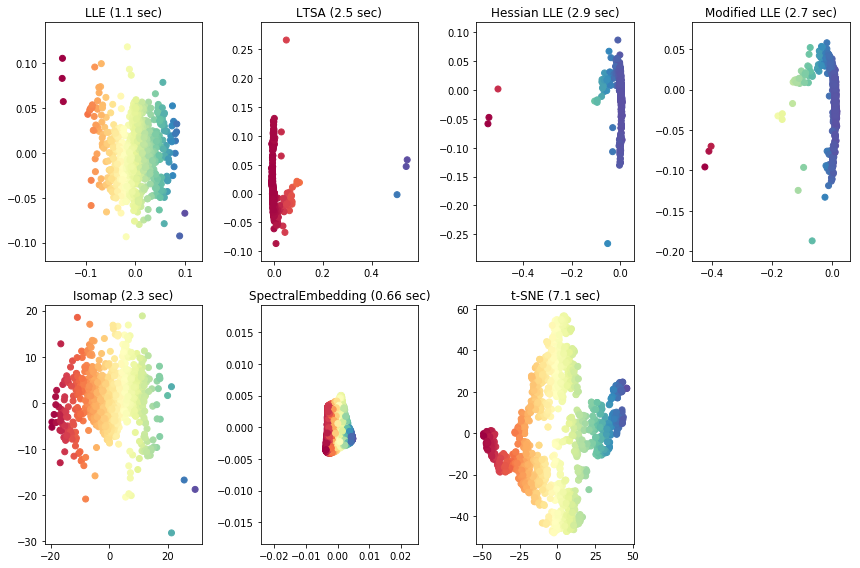

In [137]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

Axes3D

n_points = 1000
X = data_flatten_lig
n_neighbors = 100
n_components = 2

fig = plt.figure(figsize=(15,8))

#standard
t0 = time()
Y1 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'standard').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('standard', t1 - t0))

ax = fig.add_subplot(251)
plt.scatter(Y1[:, 0], Y1[:, 1], c=Y1[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#ltsa
t0 = time()
Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'ltsa').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('ltsa', t1 - t0))

ax = fig.add_subplot(252)
plt.scatter(Y2[:, 0], Y2[:, 1], c=Y2[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LTSA', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#hessian
t0 = time()
Y3 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'hessian').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('hessian', t1 - t0))

ax = fig.add_subplot(253)
plt.scatter(Y3[:, 0], Y3[:, 1], c=Y3[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('Hessian LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#modified LLE
t0 = time()
Y4 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'modified').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('modified', t1 - t0))

ax = fig.add_subplot(254)
plt.scatter(Y4[:, 0], Y4[:, 1], c=Y4[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('Modified LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#isomap
t0 = time()
Y5 = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(256)
plt.scatter(Y5[:, 0], Y5[:, 1], c=Y5[:,0], cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

# #MDS
# t0 = time()
# mds = manifold.MDS(n_components, max_iter=100, n_init=1)
# Y = mds.fit_transform(X)
# t1 = time()
# print("MDS: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(256)
# plt.scatter(Y[:, 0], Y[:, 1])
# plt.title("MDS (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#spectral embedding
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y6 = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y6[:, 0], Y6[:, 1], c=Y6[:,0], cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#t-SNE
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y71 = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y71[:, 0], Y71[:, 1], c=Y71[:,0], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()


plt.show()

standard: 6e+02 sec
ltsa: 87 sec
hessian: 89 sec
modified: 1.1e+02 sec
Isomap: 15 sec
SpectralEmbedding: 14 sec
t-SNE: 22 sec


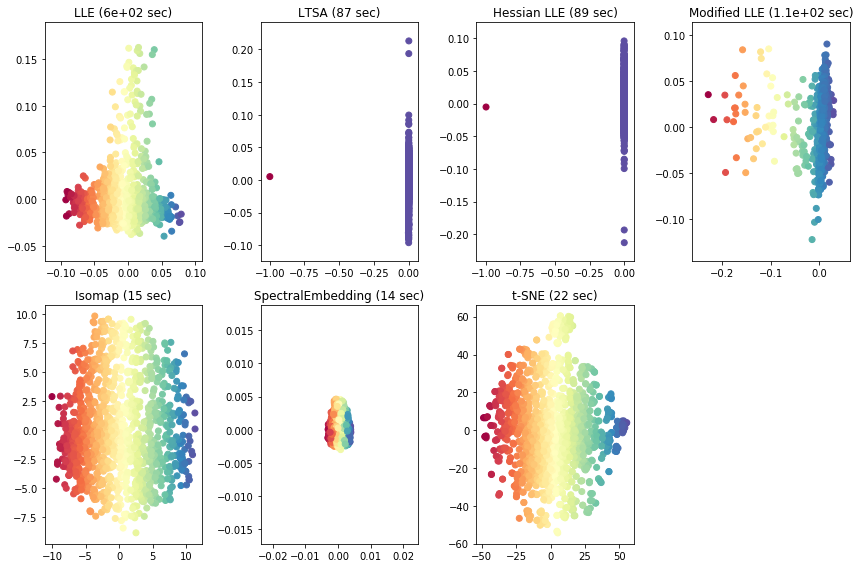

In [138]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

Axes3D

n_points = 1000
X = data_flatten_lig
n_neighbors = 100
n_components = 2

fig = plt.figure(figsize=(15,8))

#standard
t0 = time()
Y12 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'standard').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('standard', t1 - t0))

ax = fig.add_subplot(251)
plt.scatter(Y12[:, 0], Y12[:, 1], c=Y12[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#ltsa
t0 = time()
Y22 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'ltsa').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('ltsa', t1 - t0))

ax = fig.add_subplot(252)
plt.scatter(Y22[:, 0], Y22[:, 1], c=Y22[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LTSA', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#hessian
t0 = time()
Y32 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'hessian').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('hessian', t1 - t0))

ax = fig.add_subplot(253)
plt.scatter(Y32[:, 0], Y32[:, 1], c=Y32[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('Hessian LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#modified LLE
t0 = time()
Y42 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'modified').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('modified', t1 - t0))

ax = fig.add_subplot(254)
plt.scatter(Y42[:, 0], Y42[:, 1], c=Y42[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('Modified LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#isomap
t0 = time()
Y52 = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(256)
plt.scatter(Y52[:, 0], Y52[:, 1], c=Y52[:,0], cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

# #MDS
# t0 = time()
# mds = manifold.MDS(n_components, max_iter=100, n_init=1)
# Y = mds.fit_transform(X)
# t1 = time()
# print("MDS: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(256)
# plt.scatter(Y[:, 0], Y[:, 1])
# plt.title("MDS (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
#plt.tight_layout()

#spectral embedding
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y62 = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y62[:, 0], Y62[:, 1], c=Y62[:,0], cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#t-SNE
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y72 = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y72[:, 0], Y72[:, 1], c=Y72[:,0], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()


plt.show()

standard: 6.1e+02 sec
ltsa: 84 sec
hessian: 91 sec
modified: 1e+02 sec
Isomap: 16 sec
SpectralEmbedding: 14 sec
t-SNE: 21 sec


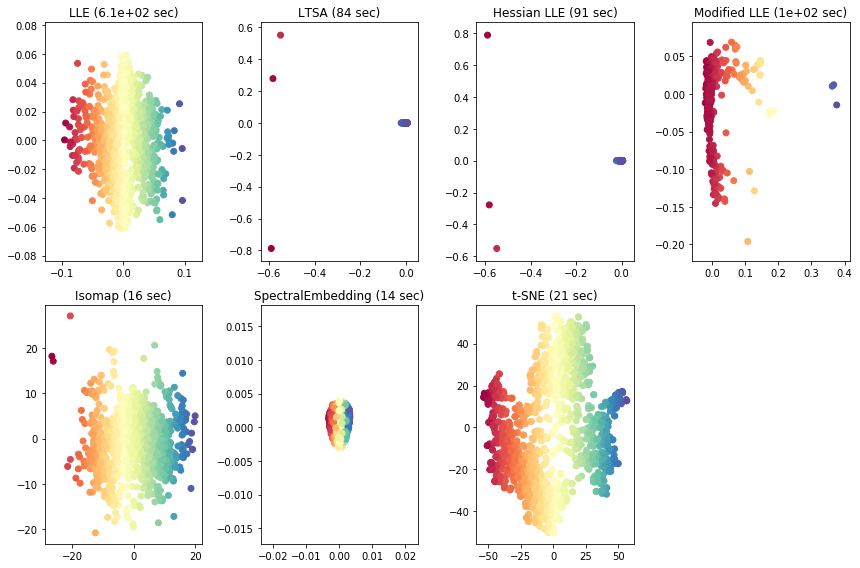

In [139]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

Axes3D

n_points = 1000
X = data_flatten_lig_prot
n_neighbors = 100
n_components = 2

fig = plt.figure(figsize=(15,8))

#standard
t0 = time()
Y13 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'standard').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('standard', t1 - t0))

ax = fig.add_subplot(251)
plt.scatter(Y13[:, 0], Y13[:, 1], c=Y13[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#ltsa
t0 = time()
Y23 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'ltsa').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('ltsa', t1 - t0))

ax = fig.add_subplot(252)
plt.scatter(Y23[:, 0], Y23[:, 1], c=Y23[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LTSA', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#hessian
t0 = time()
Y33 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'hessian').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('hessian', t1 - t0))

ax = fig.add_subplot(253)
plt.scatter(Y33[:, 0], Y33[:, 1], c=Y33[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('Hessian LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#modified LLE
t0 = time()
Y43 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method = 'modified').fit_transform(X)
t1 = time()
print("%s: %.2g sec" % ('modified', t1 - t0))

ax = fig.add_subplot(254)
plt.scatter(Y43[:, 0], Y43[:, 1], c=Y43[:,0], cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('Modified LLE', t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#isomap
t0 = time()
Y53 = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(256)
plt.scatter(Y53[:, 0], Y53[:, 1], c=Y53[:,0], cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

# #MDS
# t0 = time()
# mds = manifold.MDS(n_components, max_iter=100, n_init=1)
# Y = mds.fit_transform(X)
# t1 = time()
# print("MDS: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(256)
# plt.scatter(Y[:, 0], Y[:, 1])
# plt.title("MDS (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#spectral embedding
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y63 = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y63[:, 0], Y63[:, 1], c=Y63[:,0], cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

#t-SNE
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y73 = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y73[:, 0], Y73[:, 1], c=Y73[:,0], cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()


plt.show()